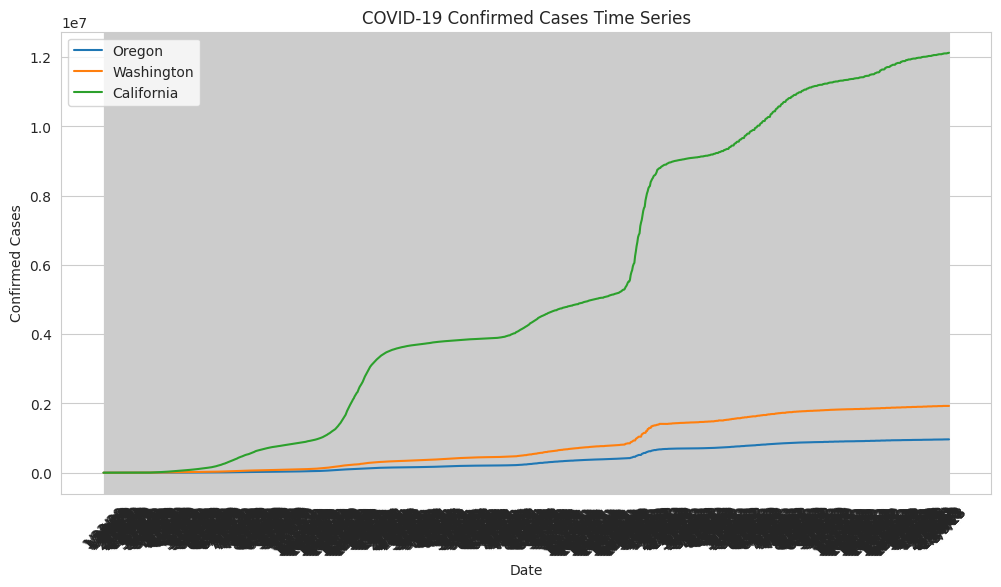

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Download and preprocess COVID-19 data from JHU-CSSE
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
data = pd.read_csv(url)

# Filter data for Oregon, Washington, and California
states = ['Oregon', 'Washington', 'California']
state_data = data[data['Province_State'].isin(states)]

# Drop columns that exist in the DataFrame
columns_to_drop = ['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Country_Region', 'Lat', 'Long_', 'Combined_Key']
state_data = state_data.drop(columns=[col for col in columns_to_drop if col in state_data.columns])

# Transpose the data to have dates as index and states as columns
state_data = state_data.groupby('Province_State').sum().T

# Plot the time series
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
for state in states:
    sns.lineplot(data=state_data[state], label=state)

plt.title("COVID-19 Confirmed Cases Time Series")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.legend(loc="upper left")
plt.xticks(rotation=45)

plt.show()

